## Advent of Code
Day 8: Playground

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

In [64]:
def render(G: nx.Graph):
    pos = nx.random_layout(G)

    nx.draw(G, pos, with_labels=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.show()

In [65]:
import math

def distance(t1: tuple, t2: tuple) -> float:
    x1, y1, z1 = t1
    x2, y2, z2 = t2

    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2)

assert distance((162,817,812), (425,690,689)) < distance((162,817,812), (431,825,988))

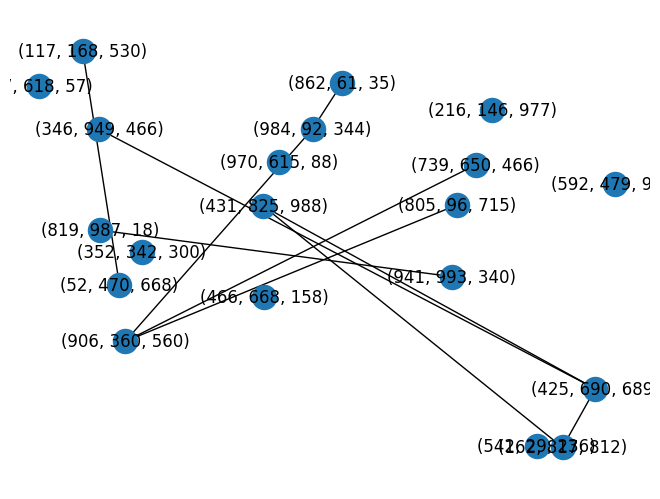

5
4
2
40


In [66]:
G = nx.Graph()

file = open("test.txt", "r")
contents = file.read()

boxes = []
for line in contents.split("\n"):
    xs, ys, zs = line.split(",")
    x, y, z = int(xs), int(ys), int(zs)
    boxes.append((x,y,z))

pairs = {}
for box1, box2 in itertools.combinations(boxes, 2):
    pairs[(box1, box2)] = distance(box1, box2)


for box in boxes:
    G.add_node(box)

sorted_pairs = sorted(pairs.items(), key=lambda item: item[1])

connections = 0
pair_num = 0
while connections < 10:
    pair = sorted_pairs[pair_num]
    box1, box2 = pair[0]

    G.add_edge(box1, box2)

    connections += 1
    # print("create edge")
    pair_num += 1

render(G)

components = list(nx.connected_components(G)) # Convert to list to print/iterate multiple timesprint(cc)
# print(components)
sorted_components = sorted(components, key=len, reverse=True)
total = 1
for x in sorted_components[:3]:
    print(len(x))
    total *= len(x)
print(total)